## Practical - 7
## Perform regression analysis using Gradient Descent approach on height and weight data.


# 1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Loading data

In [ ]:
data = pd.read_html('http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html')

# 3. Preprocessing the data

In [ ]:
# Select the first table from the loaded data
df = data[0]

# Convert height from inches to feet
df[1] = df[1].apply(lambda x: float(x) / 12 if x != "Height(Inches)" else "Height(Feet)")

# Convert weight from pounds to kilograms
df[2] = df[2].apply(lambda x: float(x) * 0.45359237 if x != "Weight(Pounds)" else "Weight(Kg)")

# Extract heights and weights as lists
heights = [float(h) for h in df[1] if h != "Height(Feet)"]
weights = [float(w) for w in df[2] if w != "Weight(Kg)"]

# 4. Calculation of linear regression using gradient descent approach

In [ ]:
# Convert lists to numpy arrays
X = np.array(heights).reshape(-1, 1)
y = np.array(weights)

# Hyperparameters
learning_rate = 0.000001
num_iterations = 1000
batch_size = 100

# Initialize coefficients with approx values
theta = np.array([-40.0, 15.0])

# Optimization using Gradient Descent
for _ in range(num_iterations):
    for batch_start in range(0, len(X), batch_size):
        # Create a mini-batch
        X_batch = X[batch_start:batch_start+batch_size]
        y_batch = y[batch_start:batch_start+batch_size]

        # Calculate predictions
        predictions = theta[0] + theta[1] * X_batch

        # Calculate the error
        error = predictions - y_batch

        # Update coefficients using gradient descent
        gradient_0 = (1 / len(X_batch)) * np.sum(error)
        gradient_1 = (1 / len(X_batch)) * np.sum(error * X_batch)

        theta[0] -= (learning_rate * gradient_0)
        theta[1] -= (learning_rate * gradient_1)

# Extract coefficients
intercept = theta[0]
slope = theta[1]

# Print the calculated optimized coefficients
print(f'Optimal (Intercept) : {intercept}')
print(f'Optimal (Slope)     : {slope}')


Optimal (Intercept) : -37.81019486730148
Optimal (Slope)     : 16.831009943263318


# 5. Prediction and plotting using linear equation

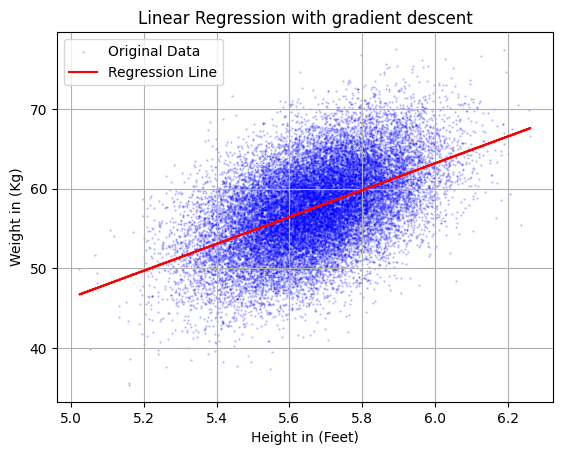

In [ ]:
# Calculate predicted weights using the linear equation
predicted_weights = intercept + slope * X

# Plot the data points and the regression line
plt.scatter(heights, weights, label="Original Data", marker='.', s=1, alpha=0.3, color='blue')
plt.plot(heights, predicted_weights, color='red', label="Regression Line")
plt.xlabel("Height in (Feet)")
plt.ylabel("Weight in (Kg)")
plt.title("Linear Regression with gradient descent")
plt.legend()
plt.grid(True)
plt.show()